<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/team%2015/Assignment_Pandas_Death_by_state_sex_agegroup_Malaysia_20012018_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name :

      Kong Jia Rou   (A20EC0198)
      Yong Zhi Yan   (A20EC0172)

# **Death by state, sex and age group Malaysia 2001-2018**

In this project, we will be using the dataset, *Death by state, sex and age group Malaysia 2001-2018* retrieved from Department of Statistics Malaysia. 

Objectives :

*   To investigate the top 5 age group according to the mean number of deaths
*   To study the highest number of deaths each year
*   To examine the total number of death in every state
*   To explore the relationship between age group and the number of death
*   To find the relationship between sex and the number of death






## Downloading the Dataset
 

1.   To begin this project, download the dataset from the link [Dataset : Death by state, sex and age group Malaysia 2001-2018.](https://www.dosm.gov.my/v1/index.php?r=column/cone&menu_id=dC9JU2RhZk9HNmxQS3hTOStuMVVLdz09)

2.  Convert the dataset file to .csv format.

3. Upload the file to GitHub repository. The dataset can be accessed from [here.](https://raw.githubusercontent.com/drshahizan/Python_EDA/main/Malaysia%20EDA/team%2015/Death_by_state_sex_and_age_group_Malaysia_2001-2018.csv) 






## Data Preparation and Cleaning
Data preparation is the process of transforming raw data prior to processing and analysis. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.It is an important step prior to processing and often involves reformatting data, making corrections to data, and combining datasets to enrich data.


First, import the library. We will be using pandas to read CSV file.

In [1]:
import pandas as pd

Read the CSV file. You could see the sample of the DataFrame with head().

In [2]:
url = 'https://raw.githubusercontent.com/drshahizan/Python_EDA/main/Malaysia%20EDA/team%2015/Death_by_state_sex_and_age_group_Malaysia_2001-2018.csv'
dataset = pd.read_csv(url)
dataset.head()

,Sex,Age group,Year,State,Number of death
0,Male,Under 1 year,2001,Johor,263.0
1,Male,Under 1 year,2001,Kedah,173.0
2,Male,Under 1 year,2001,Kelantan,198.0
3,Male,Under 1 year,2001,Melaka,59.0
4,Male,Under 1 year,2001,Negeri Sembilan,69.0


By using the .shape attribute, we can see the dataframe dimensionality. The result is a tuple containing the number of rows and columns.



*   In this dataset, we have 1,1040 rows and 5 columns.

In [3]:
dataset.shape

(11040, 5)

By using .info attribute, we can see the overview of every columns information the dataset.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              11040 non-null  object 
 1   Age group        11040 non-null  object 
 2   Year             11040 non-null  int64  
 3   State            11040 non-null  object 
 4   Number of death  10445 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 431.4+ KB


Next, we will be identifying whether there is any ocurrence of missing value in the dataset.

In [5]:
dataset.isna().sum()

Sex                  0
Age group            0
Year                 0
State                0
Number of death    595
dtype: int64

There is a total of 595 records of missing value found under the number of death column. To solve this problem, we will replace the missing value with the mean of the number of death and convert the data type to integer. 

In [6]:
dataset['Number of death'] = pd.to_numeric(dataset['Number of death'],errors='coerce')
dataset['Number of death'].fillna(int(dataset['Number of death'].mean()), inplace=True)
dataset['Number of death'] = dataset['Number of death'].astype(int)

Check again to ensure there is no missing value occur in the dataset.

In [7]:
dataset.isna().sum()

Sex                0
Age group          0
Year               0
State              0
Number of death    0
dtype: int64

From the output above, we can conclude that there are no missing values in the dataset. The dataset is ready for the next step.

## Exploratory Analysis and Visualization

Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
dataset.describe()

,Year,Number of death
count,11040.000000,11040.000000
mean,2009.695652,221.879438
std,5.236688,265.610232
min,2001.000000,0.000000
25%,2005.000000,29.000000
50%,2010.000000,126.000000
75%,2014.000000,301.000000
max,2018.000000,1835.000000


###1. Bar Chart : Number of death versus year

Text(0.5, 1.0, 'Number of Death versus Year')

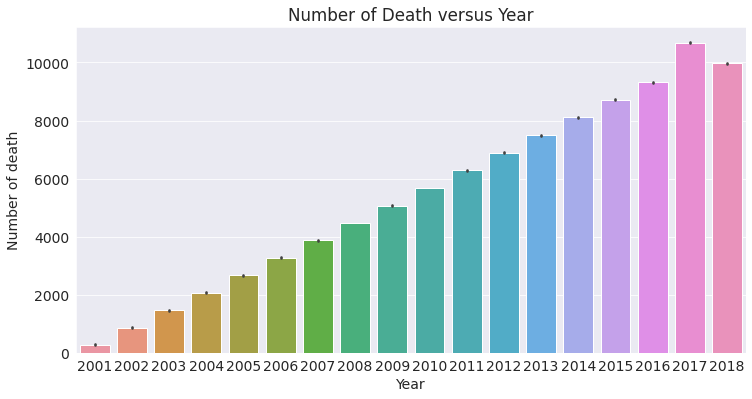

In [10]:
plt.figure(figsize=(12,6))

sns.barplot(x=dataset['Year'], y=dataset.index)
plt.xlabel("Year")
plt.ylabel("Number of death")
plt.title("Number of Death versus Year")

###2. Scatter Plot : Number of death per year versus state

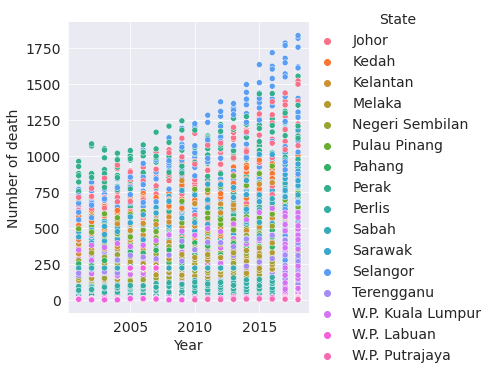

In [11]:
sns.relplot(x = "Year", y = "Number of death", data = dataset, hue = 'State', kind='scatter')

###3. Box Plot : Number of death versus sex

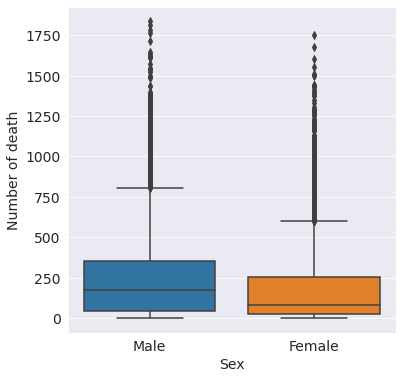

In [12]:
plt.figure(figsize = (20, 6))
plt.subplot(1,3,1)
sns.boxplot(x = 'Sex', y = 'Number of death', data = dataset)
plt.show()

###4. Pie Chart : Number of death versus age group 

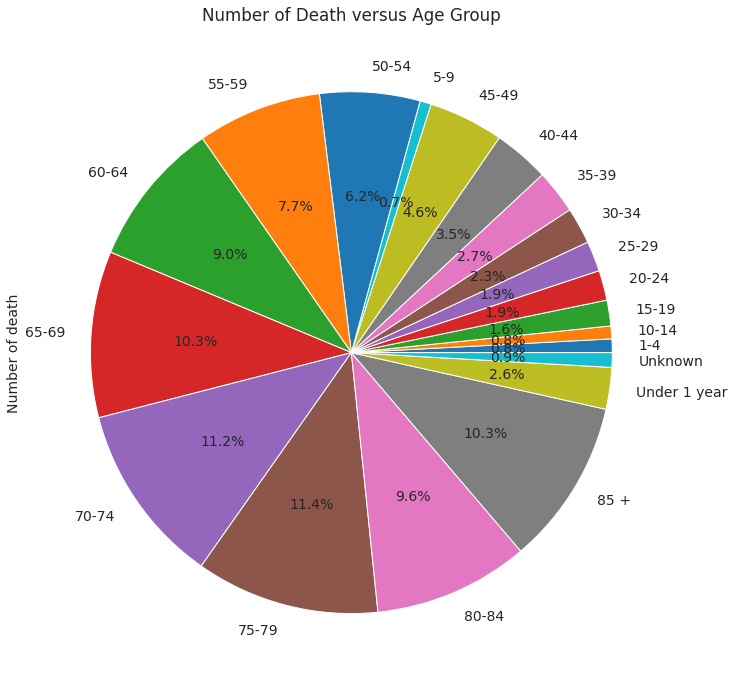

In [13]:
plt.figure(figsize = (12, 12))
data = dataset.groupby("Age group")["Number of death"].sum()
plt.title('Number of Death versus Age Group')
data.plot.pie(autopct="%.1f%%")

###5. Kernel density estimate chart

Kernel density estimation is a useful statistical method to estimate the overall shape of a random variable distribution. In other words, kernel density estimation (KDE) helps to “smooth” and explore data that does not follow any typical probability density distribution, such as normal distribution, binomial distribution and more.

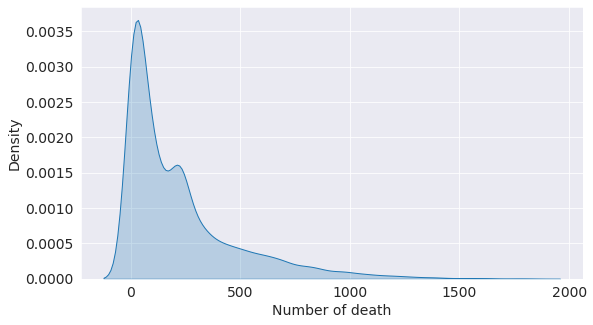

In [14]:
sns.kdeplot(dataset['Number of death'], shade=True)

## Asking and Answering Questions

In this part, we will be achieving the objectives of this project by answering the objectives. To answer the objectives, we will compute the results using Numpy/Pandas and plotting the graphs using Matplotlib/Seaborn.



#### Q1: Investigating the top 5 age group according to the mean number of deaths

In [15]:
top_agegroup = dataset.groupby('Age group')['Number of death'].mean().sort_values(ascending=False)[:5]
print(top_agegroup)

Age group
75-79    499.727599
70-74    492.763441
65-69    452.318996
85 +     450.879928
80-84    422.213262
Name: Number of death, dtype: float64


#### Q2: Studying the highest number of deaths of each year

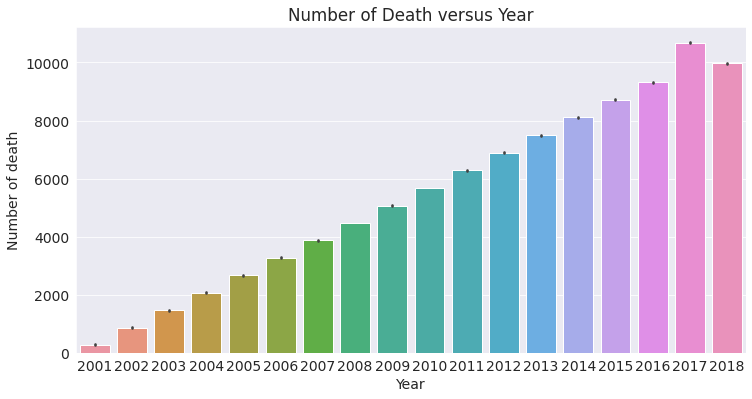

,Number of death
Year,
2001,961
2002,1083
2003,1050
2004,1018
2005,1037
2006,1076
2007,1164
2008,1206
2009,1243


In [18]:
plt.figure(figsize=(12,6))

sns.barplot(x=dataset['Year'], y=dataset.index)
plt.xlabel("Year")
plt.ylabel("Number of death")
plt.title("Number of Death versus Year")
plt.show()

pd.DataFrame(dataset.groupby('Year').max()['Number of death'])

#### Q3: Examining the total number of death in every state

In [19]:
dataset['State'].value_counts()

Johor                714
Sabah                714
W.P. Kuala Lumpur    714
Kedah                712
Kelantan             712
Melaka               712
Negeri Sembilan      712
Pulau Pinang         712
Pahang               712
Perak                712
Perlis               712
Sarawak              712
Selangor             712
Terengganu           712
W.P. Labuan          712
W.P. Putrajaya       354
Name: State, dtype: int64

#### Q4: Exploring the relationship between age group and the number of death

In [40]:
from scipy.stats import f_oneway
 
# Running the one-way anova test between Age group and Number of death
# Assumption(H0) is that Age group and Number of death are NOT correlated
 
# Finds out the Number of death data for each Age group as a list
CategoryGroupLists=dataset.groupby('Age group')['Number of death'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


As the output of the P-value is almost zero, hence, we reject H0. This means the variables are correlated with each other.

#### Q5: Finding the relationship between sex and the number of death

In [41]:
# Running the one-way anova test between Sex and Number of death
# Assumption(H0) is that Sex and Number of death are NOT correlated
 
# Finds out the Number of death data for each Sex as a list
CategoryGroupLists=dataset.groupby('Sex')['Number of death'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  3.8477874546690414e-36


As the output of the P-value is almost zero, hence, we reject H0. This means the variables are correlated with each other.

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

## References and Future Work



*   Determining the correlation between two variables using ANOVA. One-way ANOVA (also known as “analysis of variance”) is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group.        Reference : https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

*   Exploratory Data Analysis helps in identifying any outlier data points, understanding the relationships between the various attributes and structure of the data, recognizing the important variables. It helps in framing questions and visualizing the results, paving the way to make an informed choice of the machine learning algorithm for the problem at hand. Reference : https://www.analyticsvidhya.com/blog/2022/03/exploratory-data-analysis-with-an-example/


